<a href="https://colab.research.google.com/github/ettore9x9/machine_learning_examples/blob/main/ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from random import sample

In [2]:
d1 = 0
d2 = 1
D1 = pd.read_csv('drive/MyDrive/ML_datasets/MNIST/Mnist%d.csv' %d1)
D2 = pd.read_csv('drive/MyDrive/ML_datasets/MNIST/Mnist%d.csv' %d2)
D1 = D1.to_numpy()
D2 = D2.to_numpy()
nl = 100
nt = 1000
i = sample(range(D1.shape[0]),nl+nt)
D1 = D1[i,:]
i = sample(range(D2.shape[0]),nl+nt)
D2 = D2[i,:]
XL = np.concatenate((D1[range(0,nl),:],D2[range(0,nl),:]),axis=0)
YL = np.append(-np.ones(nl),np.ones(nl))
XT = np.concatenate((D1[range(nl,nl+nt),:],D2[range(nl,nl+nt),:]),axis=0)
YT = np.append(-np.ones(nt),np.ones(nt))

In [3]:
scalerX = preprocessing.MinMaxScaler()
XL = scalerX.fit_transform(XL)
XT = scalerX.transform(XT)

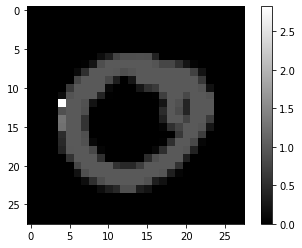

In [4]:
i = 0
fig = plt.figure()
tmp = np.reshape(XT[i,:],(28,28))
plt.imshow(tmp,cmap='gray')
plt.colorbar()

In [5]:
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix
alpha = .01
M = Ridge(alpha = alpha)
M.fit(XL,YL)
YP = M.predict(XT)
YP[YP <= 0] = -1
YP[YP  > 0] = +1
confusion_matrix(YT,YP)

array([[977,  23],
       [  8, 992]])

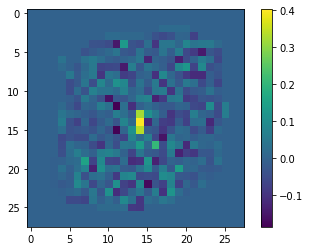

In [6]:
fig = plt.figure()
tmp = np.reshape(M.coef_,(28,28))
plt.imshow(tmp)
plt.colorbar()

In [7]:
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix

alpha = .01
M = Lasso(alpha = alpha)
M.fit(XL,YL)
YP = M.predict(XT)
YP[YP <= 0] = -1
YP[YP  > 0] = +1
confusion_matrix(YT,YP)

array([[989,  11],
       [ 21, 979]])

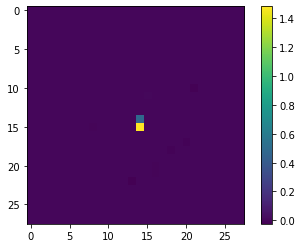

In [8]:
fig = plt.figure()
tmp = np.reshape(M.coef_,(28,28))
plt.imshow(tmp)
plt.colorbar()